# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv('Dataset_klasifikasi.csv')
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,2
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,0
2,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,2
3,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
4,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Drop kolom yang kurang relevan
df = df.drop(columns=['Order_ID','Customer_ID','Order_Date'])

# Drop data duplikat
df = df.drop_duplicates(ignore_index=True)

# Cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  1487 non-null   object 
 1   Product        1487 non-null   object 
 2   Category       1487 non-null   object 
 3   Unit_Price     1487 non-null   float64
 4   Quantity       1487 non-null   float64
 5   Discount       1487 non-null   float64
 6   Total_Price    1487 non-null   float64
 7   Region         1487 non-null   object 
 8   Cluster        1487 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 104.7+ KB


In [5]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen


In [8]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,0.126582,0.085714,0.0,0.041499,Bremen
1,B2B,Selters,Water,0.066908,0.642857,1.0,0.174667,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,0.423146,0.414286,0.5,0.457688,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.103074,0.028571,0.0,0.014094,Hessen
4,B2C,Beck's,Alcoholic Beverages,0.193490,0.042857,0.0,0.031621,Bremen


In [9]:
# Buat instance LabelEncoder
encoder = LabelEncoder()

# Melakukan encoding pada kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,5,2,0.126582,0.085714,0.0,0.041499,4
1,0,31,3,0.066908,0.642857,1.0,0.174667,13
2,0,20,2,0.423146,0.414286,0.5,0.457688,14
3,1,28,3,0.103074,0.028571,0.0,0.014094,6
4,1,2,0,0.193490,0.042857,0.0,0.031621,4


In [10]:

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1189, 8), y_train=(1189,)
Test set shape: X_test=(298, 8), y_test=(298,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [11]:
nb = GaussianNB().fit(X_train, y_train)
rf = RandomForestClassifier(random_state=69).fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Random Forest Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        82
           1    1.00000   1.00000   1.00000        91
           2    1.00000   1.00000   1.00000        77
           3    1.00000   1.00000   1.00000        48

    accuracy                        1.00000       298
   macro avg    1.00000   1.00000   1.00000       298
weighted avg    1.00000   1.00000   1.00000       298



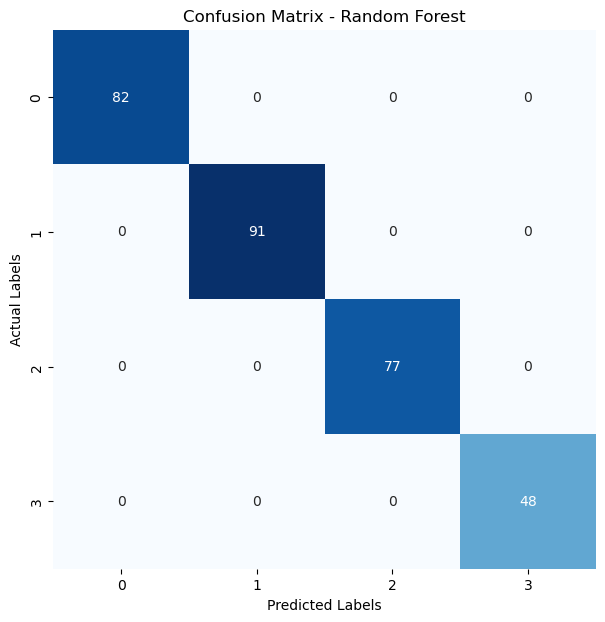

In [12]:
unique_labels = sorted(set(y))

# -----------------------------
# Random Forest
# -----------------------------

rf_y_pred = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred, digits=5))

rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print('\n')

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        82
           1    1.00000   1.00000   1.00000        91
           2    1.00000   1.00000   1.00000        77
           3    1.00000   1.00000   1.00000        48

    accuracy                        1.00000       298
   macro avg    1.00000   1.00000   1.00000       298
weighted avg    1.00000   1.00000   1.00000       298



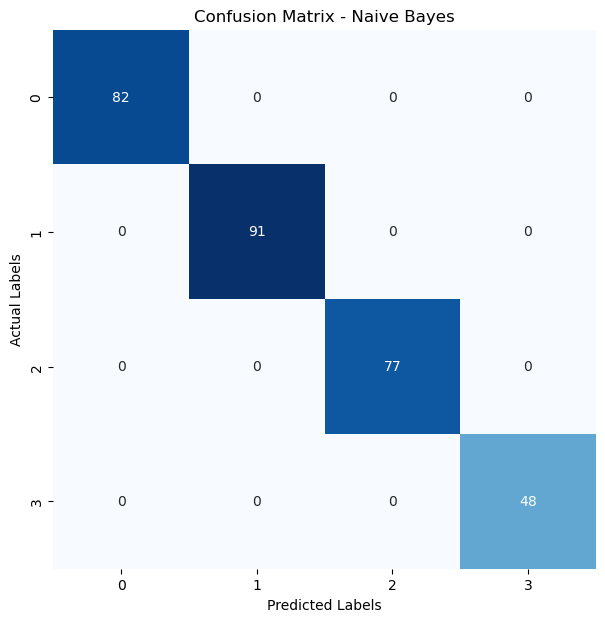

In [13]:
# -----------------------------
# Naive Bayes
# -----------------------------

nb_y_pred = nb.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_y_pred, digits=5))

nb_cm = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [14]:
# Calculate classification reports for both models
rf_report = classification_report(y_test, rf_y_pred, digits=5, output_dict=True)
nb_report = classification_report(y_test, nb_y_pred, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics = {
    'Model': ['Random Forest', 'Naive Bayes'],
    'Accuracy': [rf_report['accuracy'], nb_report['accuracy']],
    'Precision': [rf_report['weighted avg']['precision'], nb_report['weighted avg']['precision']],
    'Recall': [rf_report['weighted avg']['recall'], nb_report['weighted avg']['recall']],
    'F1-Score': [rf_report['weighted avg']['f1-score'], nb_report['weighted avg']['f1-score']]
}

# Create a DataFrame
df = pd.DataFrame(metrics)

df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,1.0,1.0,1.0,1.0
1,Naive Bayes,1.0,1.0,1.0,1.0


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [15]:
# --------------------------------------------
# 1. Random Forest Model Hyperparameter Tuning
# --------------------------------------------

# Define Random Forest hyperparameters
rf_param_dist = {
    'n_estimators': np.arange(50, 500, 50),  # Number of trees in the forest
    'max_depth': np.arange(5, 50, 5),         # Maximum depth of each tree
    'min_samples_split': np.arange(2, 20, 2), # Minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 20, 2),  # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'], # The number of features to consider at each split
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Perform RandomizedSearchCV for RandomForest
rf_random_search = RandomizedSearchCV(  estimator=RandomForestClassifier(random_state=69),  # Model to tune
                                        param_distributions=rf_param_dist,  # Hyperparameter search space
                                        n_iter=100,  # Number of random combinations to test
                                        cv=3,  # 3-fold cross-validation for model evaluation
                                        verbose=2,  # Show detailed progress during the search
                                        random_state=69,  # Set seed for reproducibility
                                        n_jobs=-1  # Use all CPU cores for parallel processing
)

# Fit the model on the training data
rf_random_search.fit(X_train, y_train)

# ------------------------------------------
# 2. Naive Bayes Model Hyperparameter Tuning
# ------------------------------------------

# Define Naive Bayes hyperparameters
nb_param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Smoothing parameter
}

# Perform RandomizedSearchCV for Naive Bayes
nb_random_search = RandomizedSearchCV(estimator=GaussianNB(),
                                      param_distributions=nb_param_dist,
                                      n_iter=100,
                                      cv=3,
                                      verbose=2,
                                      random_state=69,
                                      n_jobs=-1)

# Fit the model on the training data
nb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=69, verbose=2)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [16]:

# -----------------------------
# 1. Random Forest
# -----------------------------

# Print the best parameters and score
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)
print("Best Random Forest Accuracy:", rf_random_search.best_score_)

# Predict and evaluate the Random Forest model
rf_best_model = rf_random_search.best_estimator_
rf_best_model_y_pred = rf_best_model.predict(X_test)
print("Random Forest (best model) Classification Report:\n", classification_report(y_test, rf_best_model_y_pred, digits=5))

# -----------------------------
# 2. Naive Bayes
# -----------------------------

# Print the best parameters and score
print("Best Naive Bayes Hyperparameters:", nb_random_search.best_params_)
print("Best Naive Bayes Accuracy:", nb_random_search.best_score_)

# Predict and evaluate the Naive Bayes model
nb_best_model = nb_random_search.best_estimator_
nb_best_model_y_pred = nb_best_model.predict(X_test)
print("Naive Bayes (best model) Classification Report:\n", classification_report(y_test, nb_best_model_y_pred, digits=5))

Best Random Forest Hyperparameters: {'n_estimators': 450, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 25, 'bootstrap': True}
Best Random Forest Accuracy: 1.0
Random Forest (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        82
           1    1.00000   1.00000   1.00000        91
           2    1.00000   1.00000   1.00000        77
           3    1.00000   1.00000   1.00000        48

    accuracy                        1.00000       298
   macro avg    1.00000   1.00000   1.00000       298
weighted avg    1.00000   1.00000   1.00000       298

Best Naive Bayes Hyperparameters: {'var_smoothing': 0.0015199110829529332}
Best Naive Bayes Accuracy: 1.0
Naive Bayes (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        82
           1    1.00000   1.00000   1.00000        91


In [18]:
# Calculate classification reports for both models
rf_best_report = classification_report(y_test, rf_best_model_y_pred, digits=5, output_dict=True)
nb_best_report = classification_report(y_test, nb_best_model_y_pred, digits=5, output_dict=True)

# Extract relevant metrics (accuracy, precision, recall, F1 score)
metrics_tuned = {
    'Model': ['Random Forest (Tuned)', 'Naive Bayes (Tuned)'],
    'Accuracy': [rf_best_report['accuracy'], nb_best_report['accuracy']],
    'Precision': [rf_best_report['weighted avg']['precision'], nb_best_report['weighted avg']['precision']],
    'Recall': [rf_best_report['weighted avg']['recall'], nb_best_report['weighted avg']['recall']],
    'F1-Score': [rf_best_report['weighted avg']['f1-score'], nb_best_report['weighted avg']['f1-score']]
}

# Create a DataFrame
df_tuned = pd.DataFrame(metrics_tuned)

df_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (Tuned),1.0,1.0,1.0,1.0
1,Naive Bayes (Tuned),1.0,1.0,1.0,1.0


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [19]:
df_merged = pd.concat([df, df_tuned], ignore_index=True)
df_merged.iloc[[1, 2]] = df_merged.iloc[[2, 1]].values
df_merged

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,1.0,1.0,1.0,1.0
1,Random Forest (Tuned),1.0,1.0,1.0,1.0
2,Naive Bayes,1.0,1.0,1.0,1.0
3,Naive Bayes (Tuned),1.0,1.0,1.0,1.0
